# Lecture 15 - Hypothesis Testing

- 🤠 Author: Sandip Sonawane (sandip2@illinois.edu)
- 📆 Lecture Date: Tuesday 2022/03/08

## Lecture Notes and in-class exercises

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [1]:
import unittest
tc = unittest.TestCase()

In [2]:
# Run below imports
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
from scipy.stats import norm, t
import scipy.stats as stats
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

### What is hypothesis testing?

* When you need to make business decisions, for example how price change will affect customer base or how much should you spend on advertising, it's possible to make wild assumptions and make incorrect decisions. Such decisions can be made correctly using hypothesis testing.

* Hypothesis testing is the process of using statistics to determine the probability that a specific hypothesis is true. There are multiple hypothesis tests available, we will focus on the widely used t-test.

#### Steps in hypothesis testing
1. State the hypothesis
        a. Define null hypothesis
        b. Define alternative hypothesis
2. Specify significance level
3. Perform hypothesis testing
4. Make decisions

#### Null and Alternate Hypothesis
* The null hypothesis $H_0$ is that two possibilities are the same. The null hypothesis states `the observed difference is due to chance alone.`
* The alternative hypothesis $H_a$ is that two possibilities are not same and `the observed difference is not due to chance.`

For Example:

| Hypothesis Question | Null Hypothesis | Alternate Hypothesis |
| --- | --- | --- |
| Do cats care about the color of their food? | Cats express no food preference based on color. | Cats express food preference based on color. |
| Do teens use cell phones to access the internet more than adults? | Age has no effect on how cell phones are used for internet access. | Age has effect on how cell phones are used for internet access. |
| Are teens better at math than adults? | Age has no effect on mathematical ability. | Age has effect on mathematical ability. |
| Does taking aspirin every day reduce the chance of having a heart attack? | Taking aspirin daily does not affect heart attack risk. | Taking aspirin daily does affect heart attack risk. |

#### Significance Level
* We decide criterion to accept or reject null hypothesis
* Its value is between 0 and 1. Most common significance level is 0.05. This means that we want to be 95% confident before we reject the null hypothesis.
* The exact value of significance level is chosen based on applications. E.g in aerospace, researchers will choose values close to 0.001.

---

### 🎯 Challenge 1: Denfine null and alternate hypothesis

#### 👇 Tasks

- ✔️ Suppose we have a two sided coin and we want to check whether the coin is fair(two sides are different) or unfair.

#### 🔑 Code

Choose between `'coin is fair'` and `'coin is unfair'`.

```python
null_hypothesis = 'coin is ...'
alternate_hypothesis = 'coin is ...'
```

In [3]:
### BEGIN SOLUTION
null_hypothesis = 'coin is fair'
alternate_hypothesis = 'coin is unfair'
### END SOLUTION

print(f"Null hypothesis:\n{null_hypothesis}\n=================\nAlternate Hypothesis:\n{alternate_hypothesis}")

Null hypothesis:
coin is fair
Alternate Hypothesis:
coin is unfair


#### 🧭 Check Your Work

In [4]:
tc.assertEqual(null_hypothesis.lower(), "coin is fair")
tc.assertEqual(alternate_hypothesis.lower(), "coin is unfair")

---

### 🎯 Challenge 2: Perform Hypothesis Testing on unfair coin

#### 👇 Tasks

- ✔️ Now that we have defined null hypothesis and alternate hypothesis. It's time to perform a hypothesis testing.
- ✔️ Suppose we define our significance level to be 0.05. Each time we toss a coin, we only get heads.
- ✔️ Based on the available info, answer if we will reject the null hypothesis after two, three, four, and five coin tosses.
- ✔️ Store your judgment to the following four variables:
    - `reject_after_2_tosses`
    - `reject_after_3_tosses`
    - `reject_after_4_tosses`
    - `reject_after_5_tosses`
- ✔️ Use the slider in the below code cell to find the p-value for any number of tosses.

In [5]:
def f(H, T):
    if T > 0:
        display(f"Distrubtion: Heads- {round(H*100/(H+T), 2)}%, Tails- {round(T*100/(H+T), 2)}%")
    else:
        display(f"P-value: {(1/2)**H*100}%")
    return H+T

w = interactive(f, H=IntSlider(0, 0, 10, 1, layout=widgets.Layout(width='700px')),
                T=IntSlider(0, 0, 0, 1, layout=widgets.Layout(width='700px')))

display(w)

interactive(children=(IntSlider(value=0, description='H', layout=Layout(width='700px'), max=10), IntSlider(val…

#### 🔑 Sample Code

```python
# replace ... with True or False
reject_after_2_tosses = False
reject_after_3_tosses = ...
reject_after_4_tosses = ...
reject_after_5_tosses = ...
```

In [6]:
### BEGIN SOLUTION
reject_after_2_tosses = False
reject_after_3_tosses = False
reject_after_4_tosses = False
reject_after_5_tosses = True
### END SOLUTION

#### 🧭 Check Your Work

In [7]:
check = [reject_after_2_tosses, reject_after_3_tosses, reject_after_4_tosses, reject_after_5_tosses]
check_c = [False, not True, False, not False]
for toss in range(2, 6):
    i = toss - 2
    tc.assertEqual(check[i], check_c[i], f'Incorrect judgment for toss #{toss}, should {"not " if check_c[i] else ""}reject')

Note: When we reject the null hypothesis, it does not necessarily mean that the coin is unfair. It means that we have enough evidence to conclude that this coin is unfair.

---

### 🎯 Challenge 3: Perform Hypothesis Testing on weighted coin
Now consider another coin which gives out more heads than tails.
- Null Hypothesis $H_0$: `the coin is not weighted`
- Alternate Hypothesis $H_a$: `the coin is weighted`

#### 👇 Tasks

- ✔️ Suppose we define our significance level to 0.05. Each time we toss a coin, we only get either heads or tails.
- ✔️ Based on the available info, answer if we will reject the null hypothesis when we get below distribution of heads and tails.

| Heads | Tails | Answer |
| --- | --- | --- |
| 50 | 50 | reject_null_case1 |
| 50 | 40 | reject_null_case2 |
| 50 | 20 | reject_null_case3 |
| 50 | 5 | reject_null_case4 |

- ✔️ Store your judgment in the following four variables:
    - `reject_null_case1`
    - `reject_null_case2`
    - `reject_null_case3`
    - `reject_null_case4`
- ✔️ Use the slider in the below code cell to reaffirm your understanding.

In [8]:
def f(H, T):
    if T > 0:
        display(f"Distrubtion: Heads- {round(H*100/(H+T), 2)}%, Tails- {round(T*100/(H+T), 2)}%, p-value: {round(stats.binom_test(H, n=H+T), 6)}")
    else:
        display(f"P-value: {(1/2)**H*100}%")
    return H+T

w = interactive(f, H=IntSlider(0, 0, 50, 1, layout=widgets.Layout(width='700px')),
                T=IntSlider(0, 0, 50, 1, layout=widgets.Layout(width='700px')))

display(w)

interactive(children=(IntSlider(value=0, description='H', layout=Layout(width='700px'), max=50), IntSlider(val…

#### 🔑 Sample Code

```python
# replace ... with True or False
reject_null_case1 = False
reject_null_case2 = ...
reject_null_case3 = ...
reject_null_case4 = ...
```

In [9]:
### BEGIN SOLUTION
reject_null_case1 = False
reject_null_case2 = False
reject_null_case3 = True
reject_null_case4 = True
### END SOLUTION

#### 🧭 Check Your Work

In [10]:
tc.assertFalse(reject_null_case1)
tc.assertFalse(reject_null_case2)
tc.assertFalse(not reject_null_case3)
tc.assertFalse(not reject_null_case4)

### t-Test

* To tell a difference between two distributions, mean alone is not enough. We also need to look at the sample variance.

* A t-test is a statistical test that is used to compare the means of two groups. The null hypothesis $H_0$ is that the true difference between these group means is zero. The alternate hypothesis $H_a$ is that the true difference is not zero!

* There are two main versions of Student’s t-test:
    - Independent t-test. When the two samples are unrelated.
    - Dependent t-test. When the samples are related, such as repeated measures on the same population. It is also called a paired test.

*** You are not required to know below in details, but it's good to know. ***

* t-value calculation for independent t-test
$$t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$$ Where,

$\overline{x}_{1}$ = Mean of first sample,
$\overline{x}_{2}$ = Mean of second sample,
$n_1$ = Sample size (i.e., number of observations) of first sample,
$n_2$ = Sample size (i.e., number of observations) of second sample,
$s_1$ = Standard deviation of first sample,
$s_2$ = Standard deviation of second sample

* t-value calculation for dependent t-test:
$$t = \frac{\overline{x}_{\mathrm{diff}}-\mu_0}{s_{\overline{x}}}$$ Where, $$ s_{\overline{x}} = \frac{s_{\mathrm{diff}}}{\sqrt{n}}$$

where

$x_{\mathrm{diff}}$ = Sample mean of the differences, 
$n$ = Sample size (i.e., number of observations),
$s_{\mathrm{diff}}$ = Sample standard deviation of the differences,
$s_{\overline{x}}$ = Estimated standard error of the mean (s/sqrt(n))

The value calculated using above formulae is the x-axis value of below t-distribution probability distribution graph.

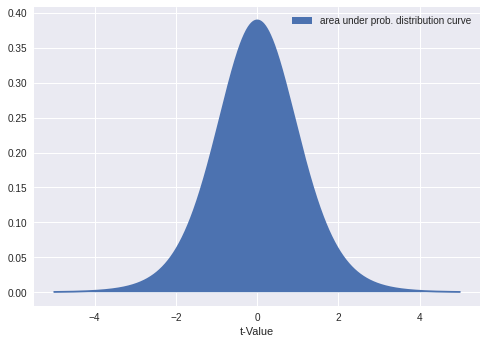

In [11]:
x_axis = np.arange(-5, 5, 0.01)
plt.plot(x_axis, t.pdf(x_axis, df=10, loc=0, scale=1))
plt.fill_between(x_axis, 0, t.pdf(x_axis, df=10, loc=0, scale=1),
                 label='area under prob. distribution curve')
plt.legend()
plt.xlabel('t-Value')
plt.show()

---

### 🎯 Challenge 4: Perform Hypothesis Testing using t-test for independent data1

First, we generate two arrays (`data1` and `data2`) having different means.

- Null Hypothesis $H_0$: `the two means are same`
- Alternate Hypothesis $H_a$: `the two means are not same`

#### 👇 Tasks

- ✔️ Perform t-test and answer if we will rejct the null hypothesis with significance level of 0.05.
- ✔️ Indicate whether we should reject the null hypotheses by creating a new variable named `reject_null` with either `True` or `False`.

```python
reject_null = True
# or
reject_null = False
```

In [12]:
np.random.seed(42)
# generate two independent samples
data1 = np.random.randn(120) + 11
data2 = np.random.randn(120) + 10.5
print(f"mean of data1: {np.mean(data1)}, mean of data2: {np.mean(data2)}")

mean of data1: 10.920830944944012, mean of data2: 10.574364262653951


In [13]:
package_calculated_t_val = stats.ttest_ind(data1,data2)[0]
print(f"t-value calculated using scipy.stats package: {package_calculated_t_val}")

t-value calculated using scipy.stats package: 2.7673293378745045


In [14]:
# get p-value for this t-statistic value
p_val = stats.ttest_ind(data1,data2)[1]
print(f"p value is: {round(p_val, 4)}")

p value is: 0.0061


In [15]:
def f(tValue):
    x_axis = np.arange(-4, 4, 0.01)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_title(f't-Test acceptance/ rejection region', fontsize= 30)
    ax.plot(x_axis, t.pdf(x_axis, df=120, loc=0, scale=1))
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<-1.98),
                    color='red', label='rejection region')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis>1.98),
                    color='red')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<1.98)&(x_axis>-1.98),
                    color='green', label='acceptance region')
    ax.axvline(tValue, ymin=0, ymax=max(t.pdf(x_axis, df=120, loc=0, scale=1)), linewidth=5, color='black')
    ax.legend(prop={'size': 18})
#     return ax

interact(f, tValue=IntSlider(0, -10, 10, 1, layout=widgets.Layout(width='700px')));

interactive(children=(IntSlider(value=0, description='tValue', layout=Layout(width='700px'), max=10, min=-10),…

You can find the critical values of t-statistic at different significance level here: https://www.statisticshowto.com/tables/t-distribution-table/


In [16]:
### BEGIN SOLUTION
reject_null = True
### END SOLUTION

print(f'reject_null={reject_null}')

reject_null=True


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [17]:
tc.assertTrue(reject_null)

---

### 🎯 Challenge 5: Perform Hypothesis Testing using t-test for independent data2

First, we generate two arrays (`data1` and `data2`) having different means.

- Null Hypothesis $H_0$: `the two means are same`
- Alternate Hypothesis $H_a$: `the two means are not same`

#### 👇 Tasks

- ✔️ Perform t-test and answer if we will rejct the null hypothesis with significance level of 0.05.
- ✔️ Indicate whether we should reject the null hypotheses by creating a new variable named `reject_null` with either `True` or `False`.

```python
reject_null = True
# or
reject_null = False
```

In [18]:
np.random.seed(42)
# generate two independent samples
data1 = np.random.randn(120) + 11
data2 = np.random.randn(120) + 11
print(f"mean of data1: {np.mean(data1)}, mean of data2: {np.mean(data2)}")

mean of data1: 10.920830944944012, mean of data2: 11.074364262653951


In [19]:
package_calculated_t_val = stats.ttest_ind(data1,data2)[0]
print(f"t-value calculated using scipy.stats package: {package_calculated_t_val}")

t-value calculated using scipy.stats package: -1.2263148988283317


In [20]:
# get p-value for this t-statistic value
p_val = stats.ttest_ind(data1,data2)[1]
print(f"p value is: {round(p_val, 4)}")

p value is: 0.2213


In [21]:
def f(tValue):
    x_axis = np.arange(-4, 4, 0.01)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_title(f't-Test acceptance/ rejection region', fontsize= 30)
    ax.plot(x_axis, t.pdf(x_axis, df=120, loc=0, scale=1))
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<-1.98),
                    color='red', label='rejection region')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis>1.98),
                    color='red')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<1.98)&(x_axis>-1.98),
                    color='green', label='acceptance region')
    ax.axvline(tValue, ymin=0, ymax=max(t.pdf(x_axis, df=120, loc=0, scale=1)), linewidth=5, color='black')
    ax.legend(prop={'size': 18})
#     return ax

interact(f, tValue=IntSlider(0, -10, 10, 1, layout=widgets.Layout(width='700px')));

interactive(children=(IntSlider(value=0, description='tValue', layout=Layout(width='700px'), max=10, min=-10),…

You can find the critical values of t-statistic at different significance level here: https://www.statisticshowto.com/tables/t-distribution-table/


In [22]:
### BEGIN SOLUTION
reject_null = False
### END SOLUTION

print(f'reject_null={reject_null}')

reject_null=False


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [23]:
tc.assertFalse(reject_null)

---

### 🎯 Challenge 6: Perform Hypothesis Testing using t-test for dependent data1

First, we generate two arrays (`data1` and `data2`) having different means.

- Null Hypothesis $H_0$: `the two means are same`
- Alternate Hypothesis $H_a$: `the two means are not same`

#### 👇 Tasks

- ✔️ Perform t-test and answer if we will rejct the null hypothesis with significance level of 0.05.
- ✔️ Indicate whether we should reject the null hypotheses by creating a new variable named `reject_null` with either `True` or `False`.

```python
reject_null = True
# or
reject_null = False
```

In [24]:
np.random.seed(42)
# generate two independent samples
data1 = np.random.randn(120) + 10
data2 = data1 + np.random.uniform(low=-1, high=1, size= 120)
print(f"mean of data1: {np.mean(data1)}, mean of data2: {np.mean(data2)}")

mean of data1: 9.920830944944012, mean of data2: 9.985756157822587


In [25]:
# function for calculating the t-test for two dependent samples
package_calculated_t_val = stats.ttest_rel(data1,data2)[0]
print(f"t-value calculated using scipy.stats package: {package_calculated_t_val}")

t-value calculated using scipy.stats package: -1.2262361608443657


In [26]:
# get p-value for this t-statistic value
p_val = stats.ttest_rel(data1,data2)[1]
print(f"p value is: {round(p_val, 4)}")

p value is: 0.2225


In [27]:
def f(tValue):
    x_axis = np.arange(-4, 4, 0.01)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_title(f't-Test acceptance/ rejection region', fontsize= 30)
    ax.plot(x_axis, t.pdf(x_axis, df=120, loc=0, scale=1))
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<-1.98),
                    color='red', label='rejection region')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis>1.98),
                    color='red')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<1.98)&(x_axis>-1.98),
                    color='green', label='acceptance region')
    ax.axvline(tValue, ymin=0, ymax=max(t.pdf(x_axis, df=120, loc=0, scale=1)), linewidth=5, color='black')
    ax.legend(prop={'size': 18})
#     return ax

interact(f, tValue=IntSlider(0, -10, 10, 1, layout=widgets.Layout(width='700px')));

interactive(children=(IntSlider(value=0, description='tValue', layout=Layout(width='700px'), max=10, min=-10),…

You can find the critical values of t-statistic at different significance level here: https://www.statisticshowto.com/tables/t-distribution-table/


In [28]:
### BEGIN SOLUTION
reject_null = False
### END SOLUTION

print(f'reject_null={reject_null}')

reject_null=False


#### 🧭 Check Your Work

In [29]:
tc.assertFalse(reject_null)

---

### 🎯 Challenge 7: Perform Hypothesis Testing using t-test for dependent data2

First, we generate two arrays (`data1` and `data2`) having different means.

- Null Hypothesis $H_0$: `the two means are same`
- Alternate Hypothesis $H_a$: `the two means are not same`

#### 👇 Tasks

- ✔️ Perform t-test and answer if we will rejct the null hypothesis with significance level of 0.05.
- ✔️ Indicate whether we should reject the null hypotheses by creating a new variable named `reject_null` with either `True` or `False`.

```python
reject_null = True
# or
reject_null = False
```

In [30]:
np.random.seed(42)
# generate two independent samples
data1 = np.random.randn(120) + 10
data2 = data1 + np.random.uniform(low=-1, high=1.3, size= 120)
print(f"mean of data1: {np.mean(data1)}, mean of data2: {np.mean(data2)}")

mean of data1: 9.920830944944012, mean of data2: 10.145494939754373


In [31]:
package_calculated_t_val = stats.ttest_rel(data1,data2)[0]
print(f"t-value calculated using scipy.stats package: {package_calculated_t_val}")

t-value calculated using scipy.stats package: -3.6897451733721787


In [32]:
# get p-value for this t-statistic value
p_val = stats.ttest_rel(data1,data2)[1]
print(f"p value is: {round(p_val, 4)}")

p value is: 0.0003


In [33]:
def f(tValue):
    x_axis = np.arange(-4, 4, 0.01)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_title(f't-Test acceptance/ rejection region', fontsize= 30)
    ax.plot(x_axis, t.pdf(x_axis, df=120, loc=0, scale=1))
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<-1.98),
                    color='red', label='rejection region')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis>1.98),
                    color='red')
    ax.fill_between(x_axis, 0, t.pdf(x_axis, df=120, loc=0, scale=1), where=(x_axis<1.98)&(x_axis>-1.98),
                    color='green', label='acceptance region')
    ax.axvline(tValue, ymin=0, ymax=max(t.pdf(x_axis, df=120, loc=0, scale=1)), linewidth=5, color='black')
    ax.legend(prop={'size': 18})
#     return ax

interact(f, tValue=IntSlider(0, -10, 10, 1, layout=widgets.Layout(width='700px')));

interactive(children=(IntSlider(value=0, description='tValue', layout=Layout(width='700px'), max=10, min=-10),…

You can find the critical values of t-statistic at different significance level here: https://www.statisticshowto.com/tables/t-distribution-table/


In [34]:
### BEGIN SOLUTION
reject_null = True
### END SOLUTION

print(f'reject_null={reject_null}')

reject_null=True


#### 🧭 Check Your Work

In [35]:
tc.assertTrue(reject_null)